In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [98]:
df1= pd.read_csv('https://raw.githubusercontent.com/anishantony8/Project_File/main/avocado.csv')
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [6]:
df1['Day'] = pd.DatetimeIndex(df1['Date']).day
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [7]:
df = df1.drop(['Unnamed: 0','Date'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [9]:
df.shape

(18249, 14)

In [10]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [11]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [99]:
[i for i in df1.columns if df1[i].isnull().sum()>0]

[]

Text(0.5, 1.0, 'AveragePrice vs Month')

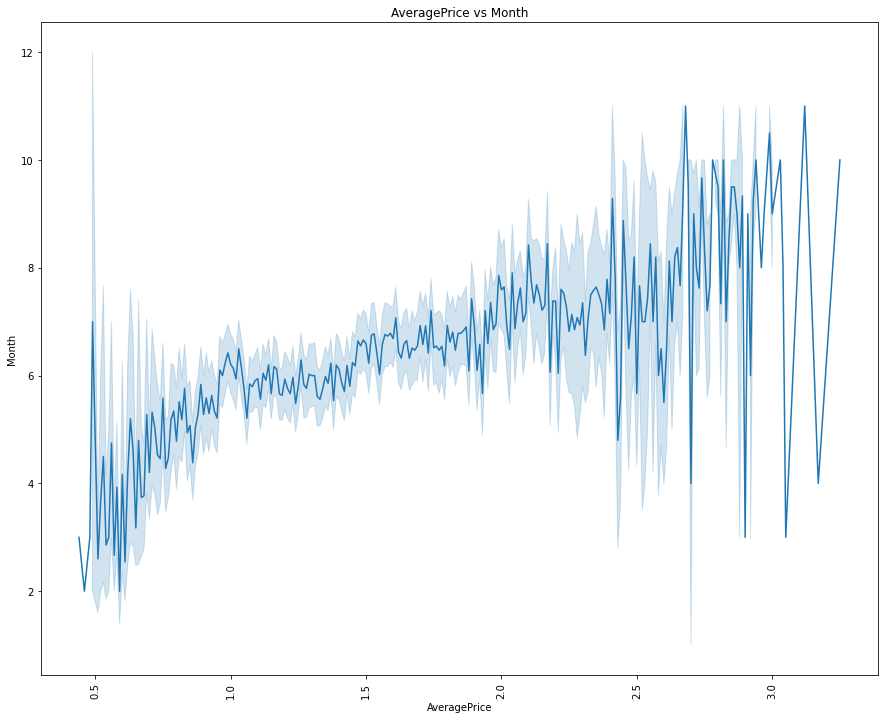

In [12]:
plt.figure(figsize=(15,12))
sns.lineplot(x='AveragePrice',y='Month',data=df)
plt.xticks(rotation=90)
plt.xlabel('AveragePrice')
plt.ylabel('Month')
plt.title('AveragePrice vs Month')

Text(0.5, 1.0, 'AveragePrice vs year')

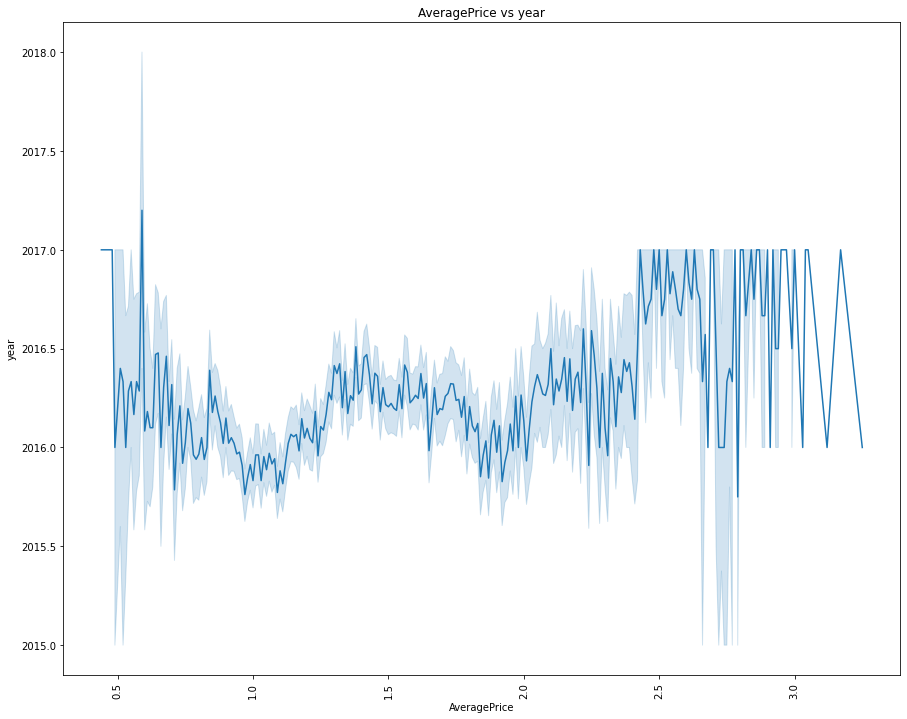

In [13]:
plt.figure(figsize=(15,12))
sns.lineplot(x='AveragePrice',y='year',data=df)
plt.xticks(rotation=90)
plt.xlabel('AveragePrice')
plt.ylabel('year')
plt.title('AveragePrice vs year')

Text(0.5, 1.0, 'AveragePrice vs Month')

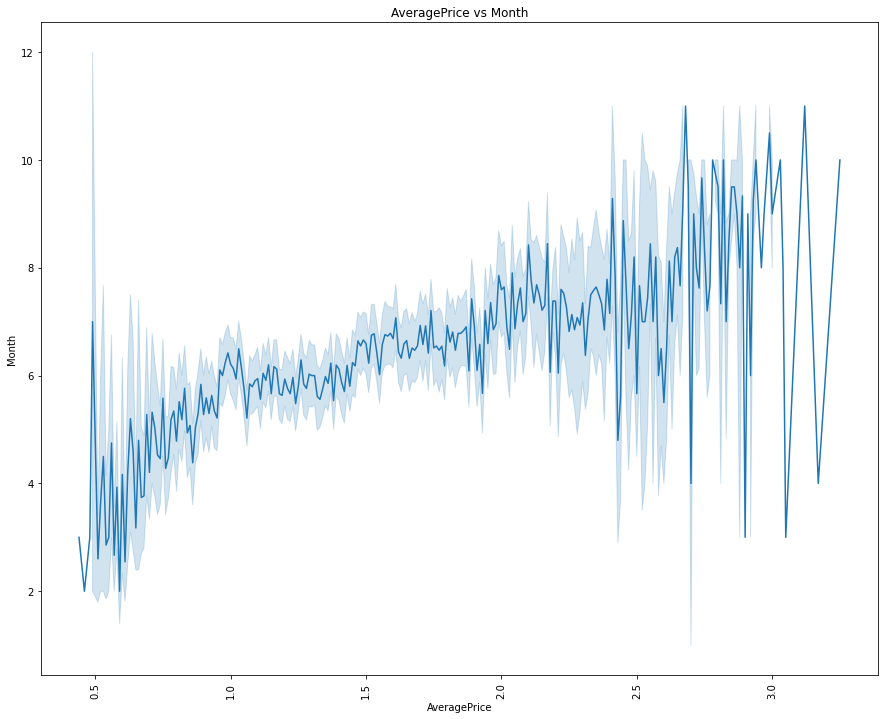

In [14]:
plt.figure(figsize=(15,12))
sns.lineplot(x='AveragePrice',y='Month',data=df)
plt.xticks(rotation=90)
plt.xlabel('AveragePrice')
plt.ylabel('Month')
plt.title('AveragePrice vs Month')

Text(0.5, 1.0, 'Day vs Day')

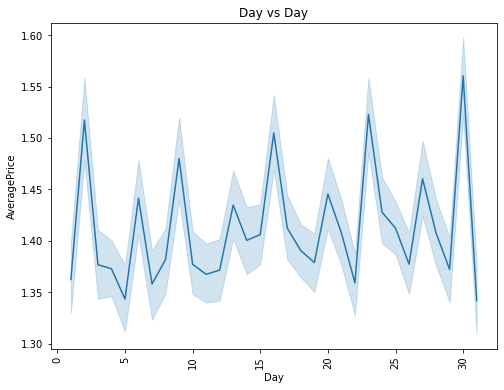

In [15]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Day',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('AveragePrice')
plt.title('Day vs Day')

Text(0.5, 1.0, 'Month vs AveragePrice')

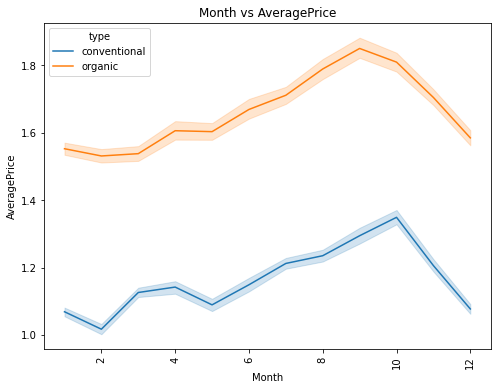

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Month',y='AveragePrice',data=df,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('AveragePrice')
plt.title('Month vs AveragePrice')

Text(0.5, 1.0, 'year vs AveragePrice')

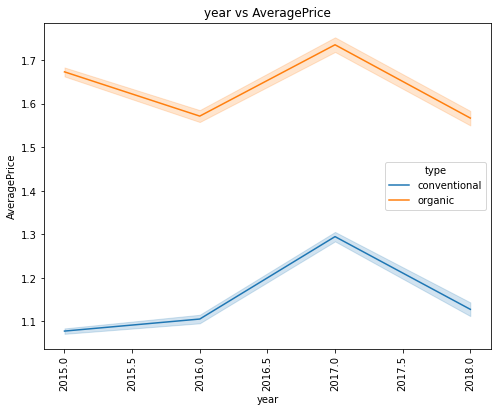

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x='year',y='AveragePrice',data=df,hue='type')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.title('year vs AveragePrice')

Text(0.5, 1.0, 'Day vs AveragePrice')

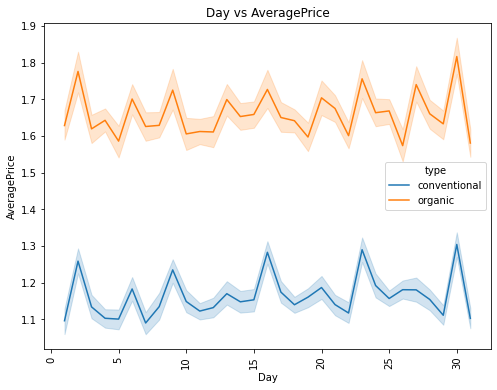

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Day',y='AveragePrice',data=df,hue='type')
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('AveragePrice')
plt.title('Day vs AveragePrice')

Text(0.5, 1.0, 'region vs AveragePrice')

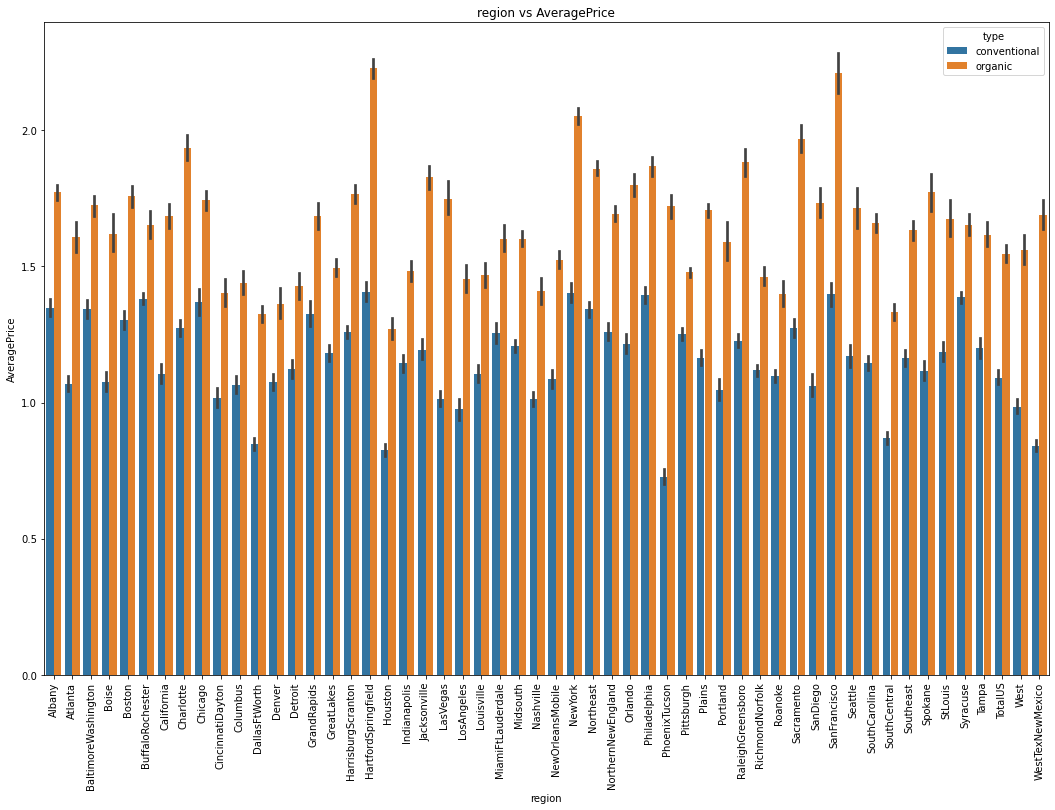

In [19]:
plt.figure(figsize=(18,12))
sns.barplot(x='region',y='AveragePrice',data=df,hue='type')
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.title('region vs AveragePrice')

Text(0.5, 1.0, 'year vs Total Volume')

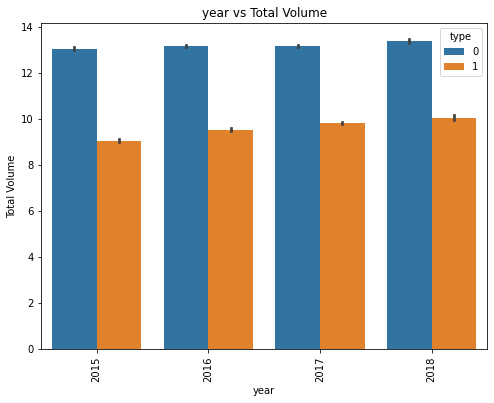

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(x='year',y='Total Volume',data=df,hue='type')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('Total Volume')
plt.title('year vs Total Volume')

Text(0.5, 1.0, 'year vs AveragePrice')

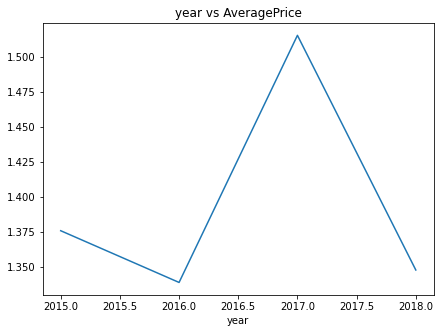

In [21]:
year=df.groupby('year').mean()
plt.figure(figsize=(7,5))
year['AveragePrice'].plot()
plt.title('year vs AveragePrice')

Text(0.5, 1.0, 'Day vs AveragePrice')

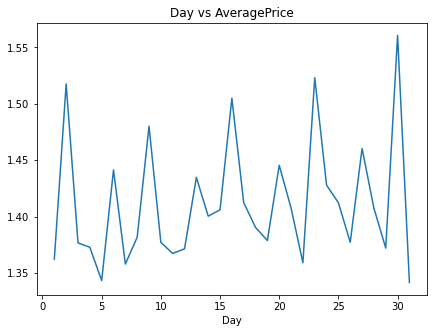

In [22]:
Day=df.groupby('Day').mean()
plt.figure(figsize=(7,5))
Day['AveragePrice'].plot()
plt.title('Day vs AveragePrice')

Text(0.5, 1.0, 'Month vs AveragePrice')

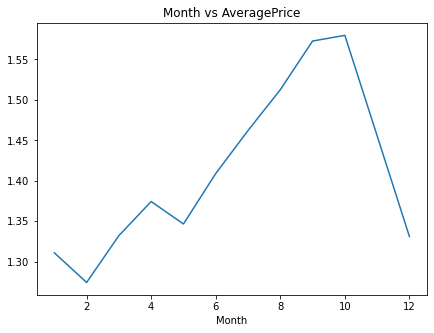

In [23]:
Month=df.groupby('Month').mean()
plt.figure(figsize=(7,5))
Month['AveragePrice'].plot()
plt.title('Month vs AveragePrice')

In [24]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Text(0.5, 1.0, 'type vs region')

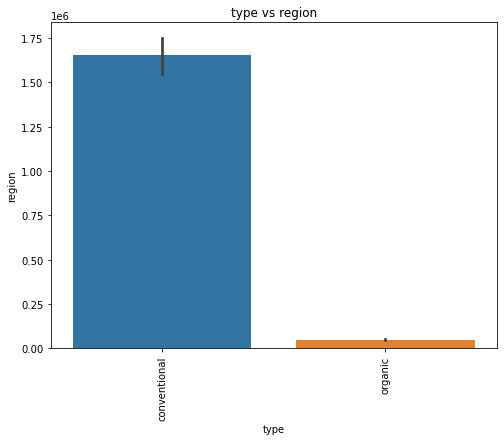

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='type',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.xlabel('type')
plt.ylabel('region')
plt.title('type vs region')

Text(0.5, 1.0, 'type vs AveragePrice')

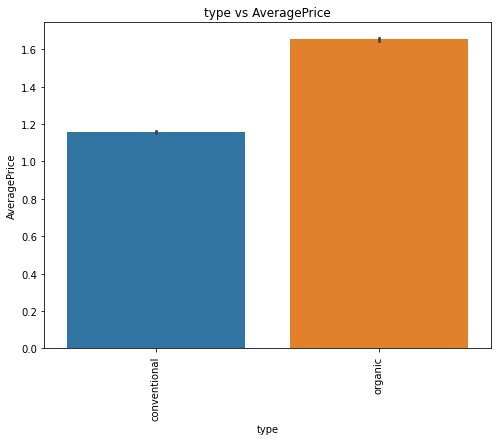

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='type',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('type')
plt.ylabel('AveragePrice')
plt.title('type vs AveragePrice')

Text(0.5, 1.0, 'region vs AveragePrice')

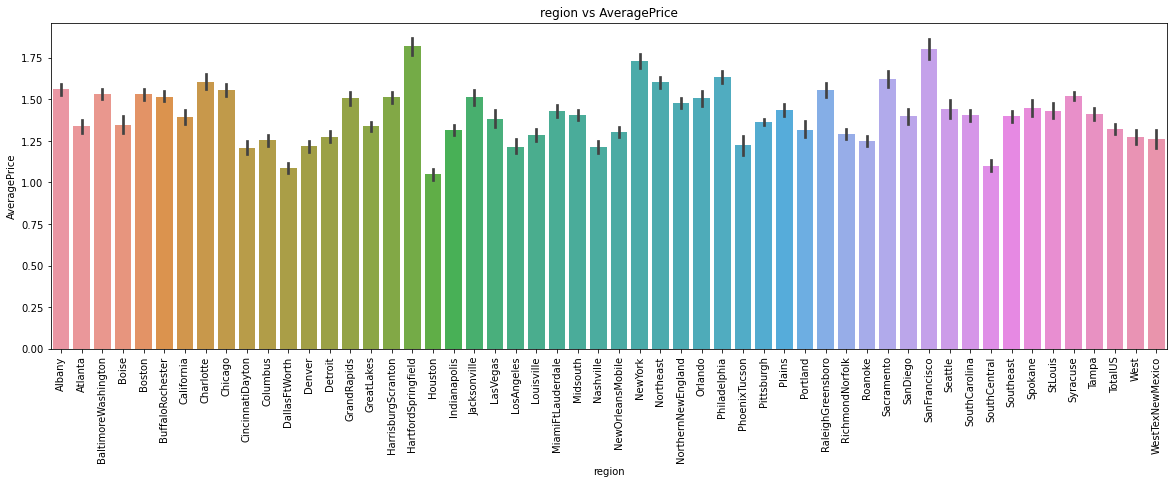

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.title('region vs AveragePrice')

Text(0.5, 1.0, 'region vs TotalVolume')

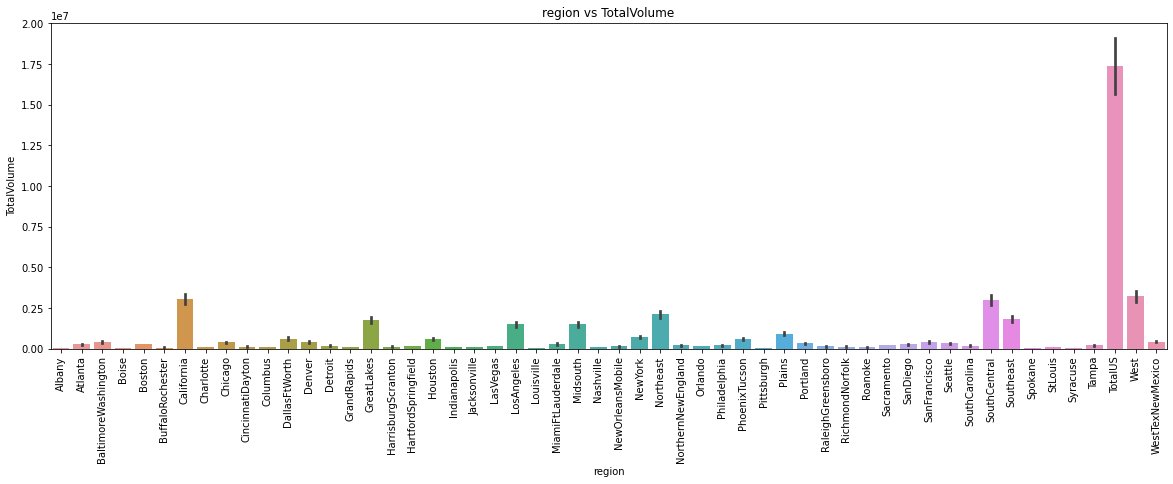

In [28]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('TotalVolume')
plt.title('region vs TotalVolume')

Text(0.5, 1.0, 'region vs 4046')

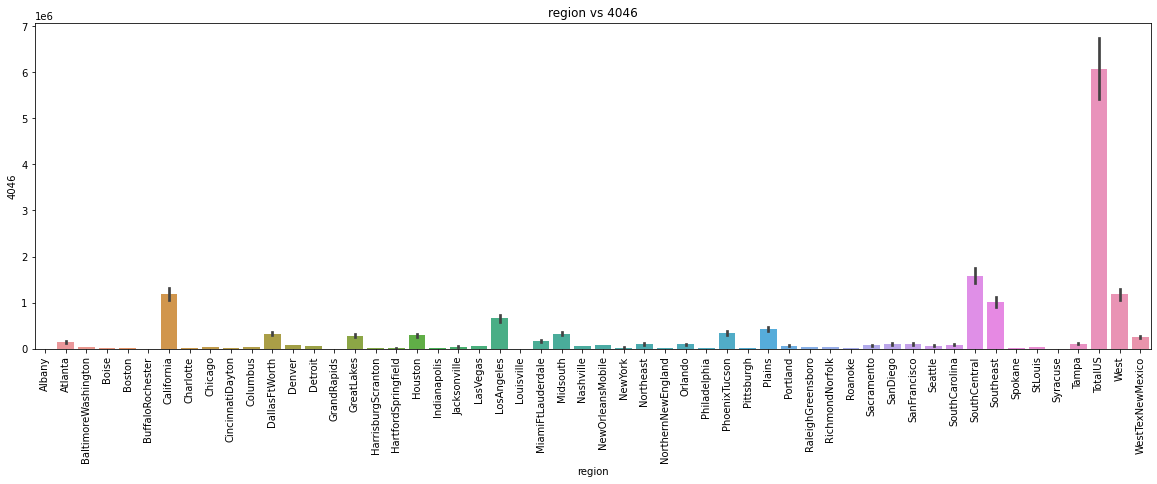

In [29]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='4046',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('4046')
plt.title('region vs 4046')

Text(0.5, 1.0, 'region vs 4225')

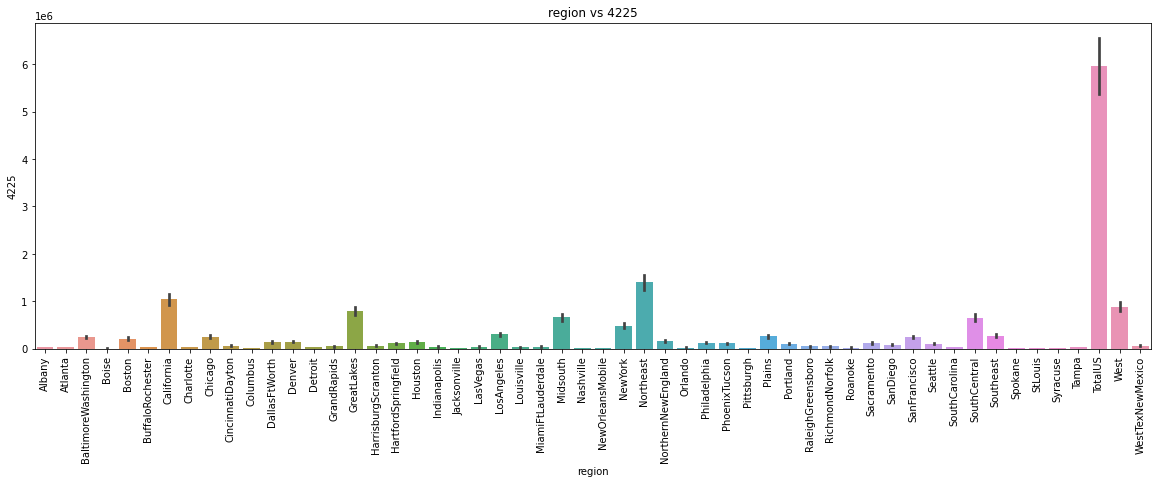

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='4225',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('4225')
plt.title('region vs 4225')

Text(0.5, 1.0, 'region vs 4770')

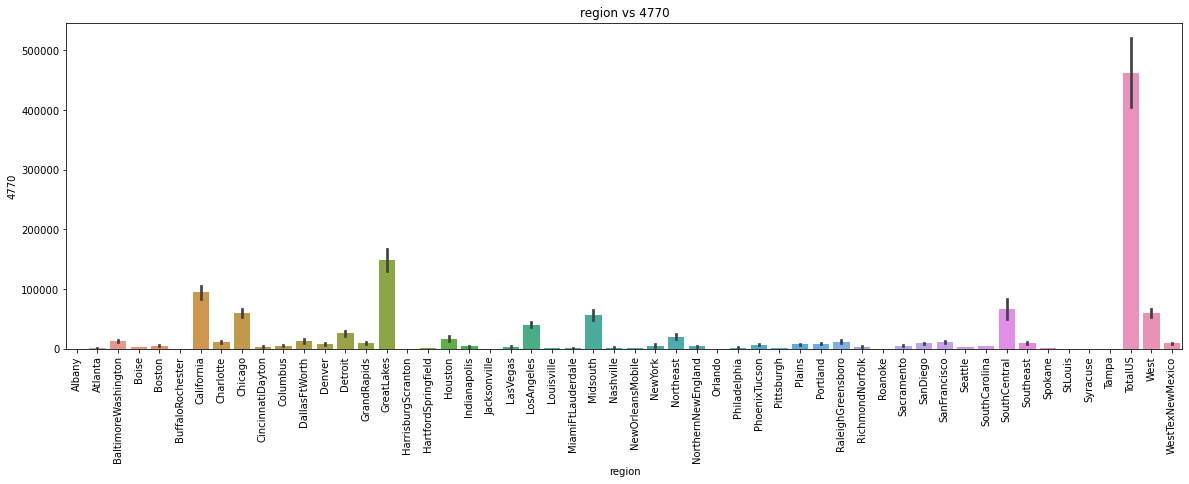

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='4770',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('4770')
plt.title('region vs 4770')

Text(0.5, 1.0, 'region vs Total Bags')

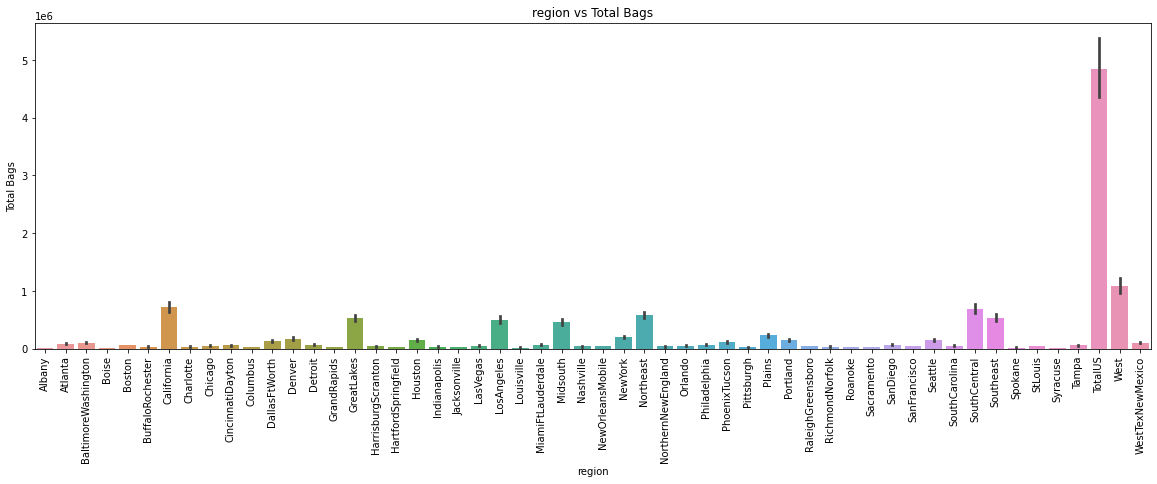

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='Total Bags',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Total Bags')
plt.title('region vs Total Bags')

Text(0.5, 1.0, 'region vs Small Bags')

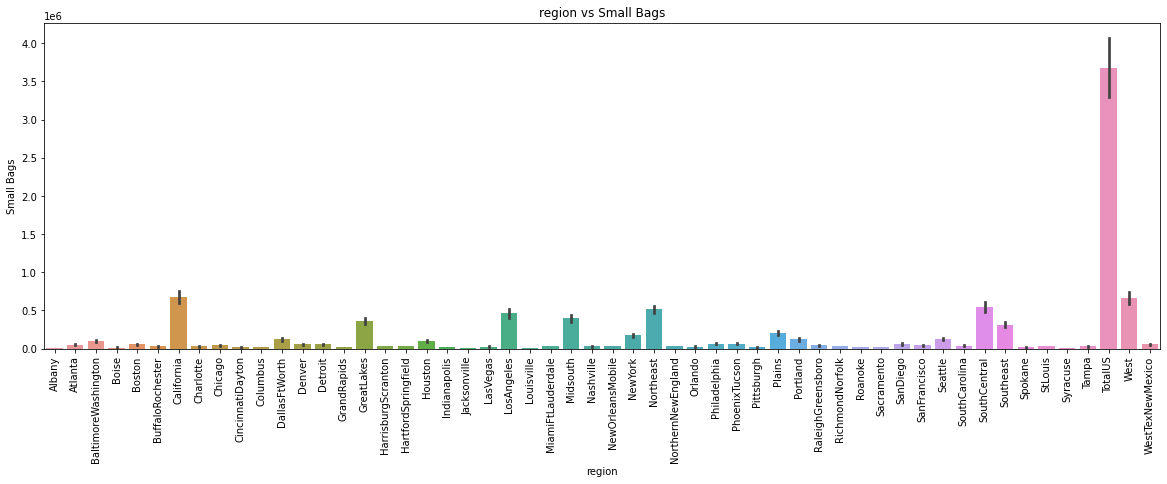

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='Small Bags',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Small Bags')
plt.title('region vs Small Bags')

Text(0.5, 1.0, 'region vs Large Bags')

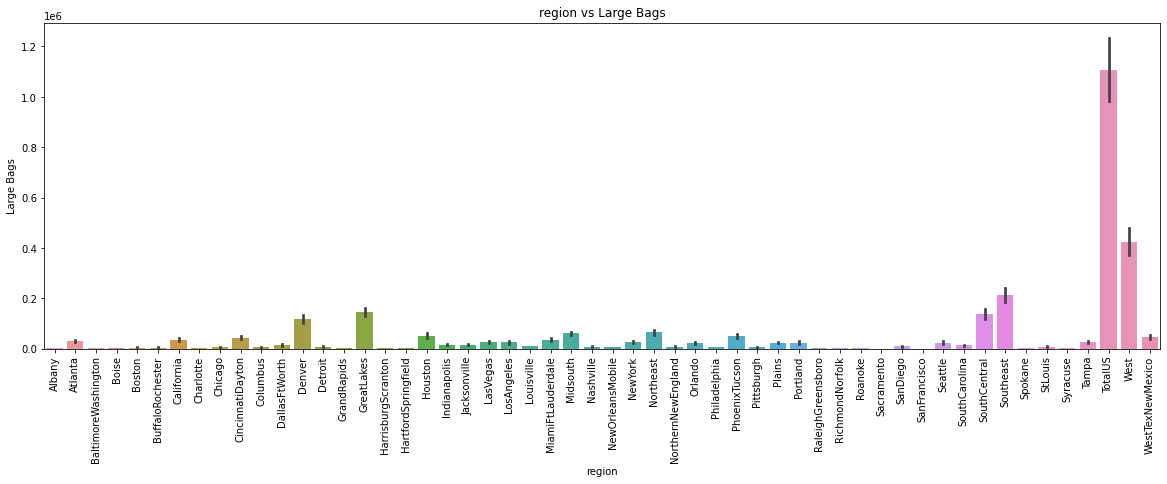

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='Large Bags',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Large Bags')
plt.title('region vs Large Bags')

Text(0.5, 1.0, 'region vs XLarge Bags')

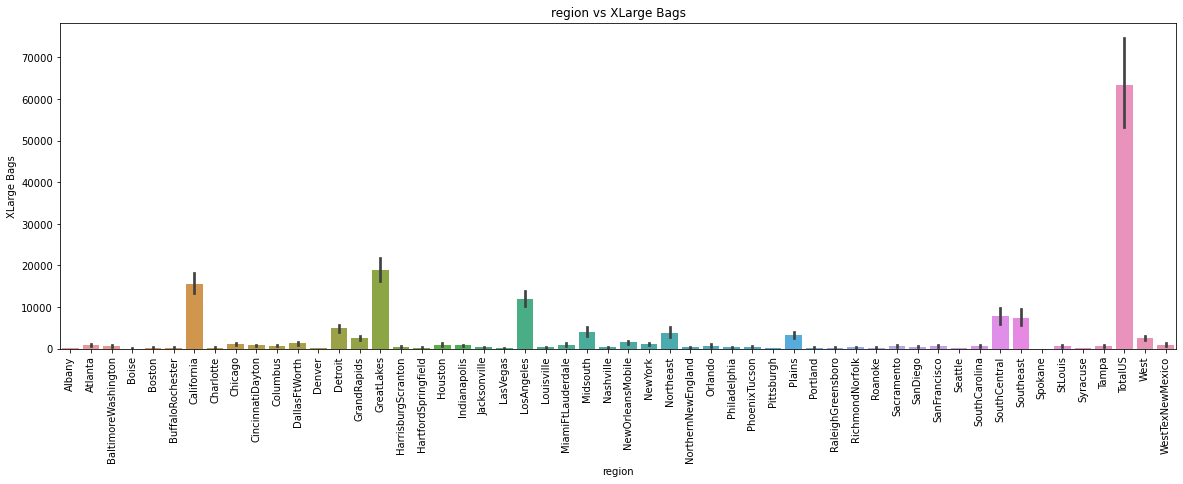

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='XLarge Bags',data=df)
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('XLarge Bags')
plt.title('region vs XLarge Bags')

Text(0.5, 1.0, '4046 vs AveragePrice')

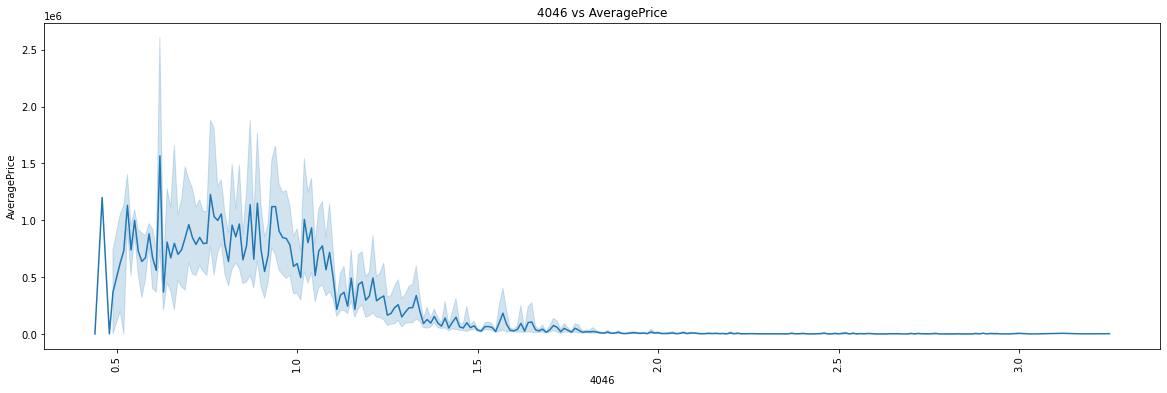

In [36]:
plt.figure(figsize=(20,6))
sns.lineplot(x='AveragePrice',y='4046',data=df)
plt.xticks(rotation=90)
plt.xlabel('4046')
plt.ylabel('AveragePrice')
plt.title('4046 vs AveragePrice')

Text(0.5, 1.0, '4225 vs AveragePrice')

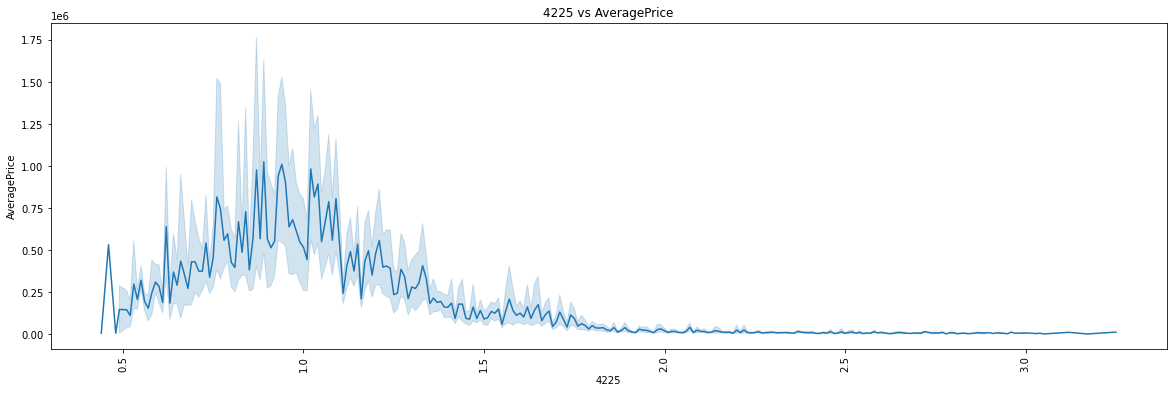

In [37]:
plt.figure(figsize=(20,6))
sns.lineplot(x='AveragePrice',y='4225',data=df)
plt.xticks(rotation=90)
plt.xlabel('4225')
plt.ylabel('AveragePrice')
plt.title('4225 vs AveragePrice')

Text(0.5, 1.0, '4770 vs AveragePrice')

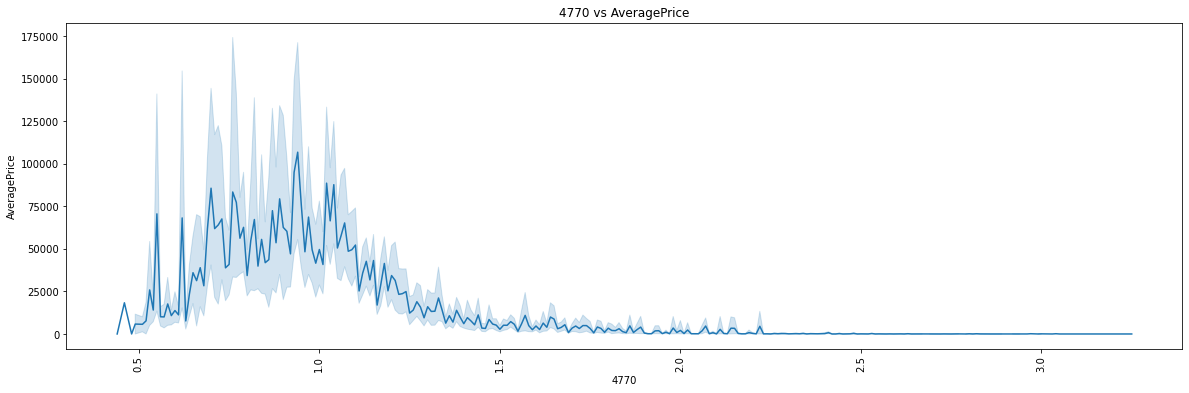

In [38]:
plt.figure(figsize=(20,6))
sns.lineplot(x='AveragePrice',y='4770',data=df)
plt.xticks(rotation=90)
plt.xlabel('4770')
plt.ylabel('AveragePrice')
plt.title('4770 vs AveragePrice')

In [39]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [40]:
df.groupby('Month')['type'].value_counts()

Month  type        
1      conventional    972
       organic         972
2      conventional    864
       organic         864
3      conventional    918
       organic         918
4      conventional    702
       organic         702
5      conventional    756
       organic         756
6      conventional    648
       organic         646
7      conventional    756
       organic         756
8      conventional    702
       organic         702
9      conventional    648
       organic         648
10     conventional    756
       organic         756
11     conventional    702
       organic         702
12     conventional    702
       organic         701
Name: type, dtype: int64

In [41]:
s = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags' ]

In [102]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.586934,-0.551596,-0.459261,-0.507403,-0.574304,-0.497023,-0.485341,-0.380619,0.619118,0.096924,-0.030929,0.153596,0.029890
Total Volume,-0.586934,1.000000,0.886083,0.914408,0.831601,0.947245,0.912346,0.672093,0.659128,-0.793844,0.079282,0.123788,-0.028577,-0.009460
4046,-0.551596,0.886083,1.000000,0.764740,0.746330,0.800158,0.780186,0.584306,0.583520,-0.719482,0.007117,0.200752,-0.026643,-0.006956
4225,-0.459261,0.914408,0.764740,1.000000,0.799201,0.812191,0.770560,0.618016,0.593321,-0.741367,0.007601,0.082283,-0.026360,-0.008487
4770,-0.507403,0.831601,0.746330,0.799201,1.000000,0.775743,0.769555,0.555664,0.639673,-0.778274,-0.051923,0.082727,-0.021446,-0.001884
Total Bags,-0.574304,0.947245,0.800158,0.812191,0.775743,1.000000,0.947593,0.712659,0.638414,-0.725180,0.209452,0.130593,-0.017717,-0.005820
Small Bags,-0.497023,0.912346,0.780186,0.770560,0.769555,0.947593,1.000000,0.551449,0.621203,-0.724734,0.182931,0.114967,-0.013367,-0.002842
Large Bags,-0.485341,0.672093,0.584306,0.618016,0.555664,0.712659,0.551449,1.000000,0.466647,-0.496650,0.188466,0.123820,-0.017843,-0.001298
XLarge Bags,-0.380619,0.659128,0.583520,0.593321,0.639673,0.638414,0.621203,0.466647,1.000000,-0.625329,0.164443,0.021915,0.003622,0.006624
type,0.619118,-0.793844,-0.719482,-0.741367,-0.778274,-0.725180,-0.724734,-0.496650,-0.625329,1.000000,0.009091,-0.010840,-0.004957,-0.000880


[]

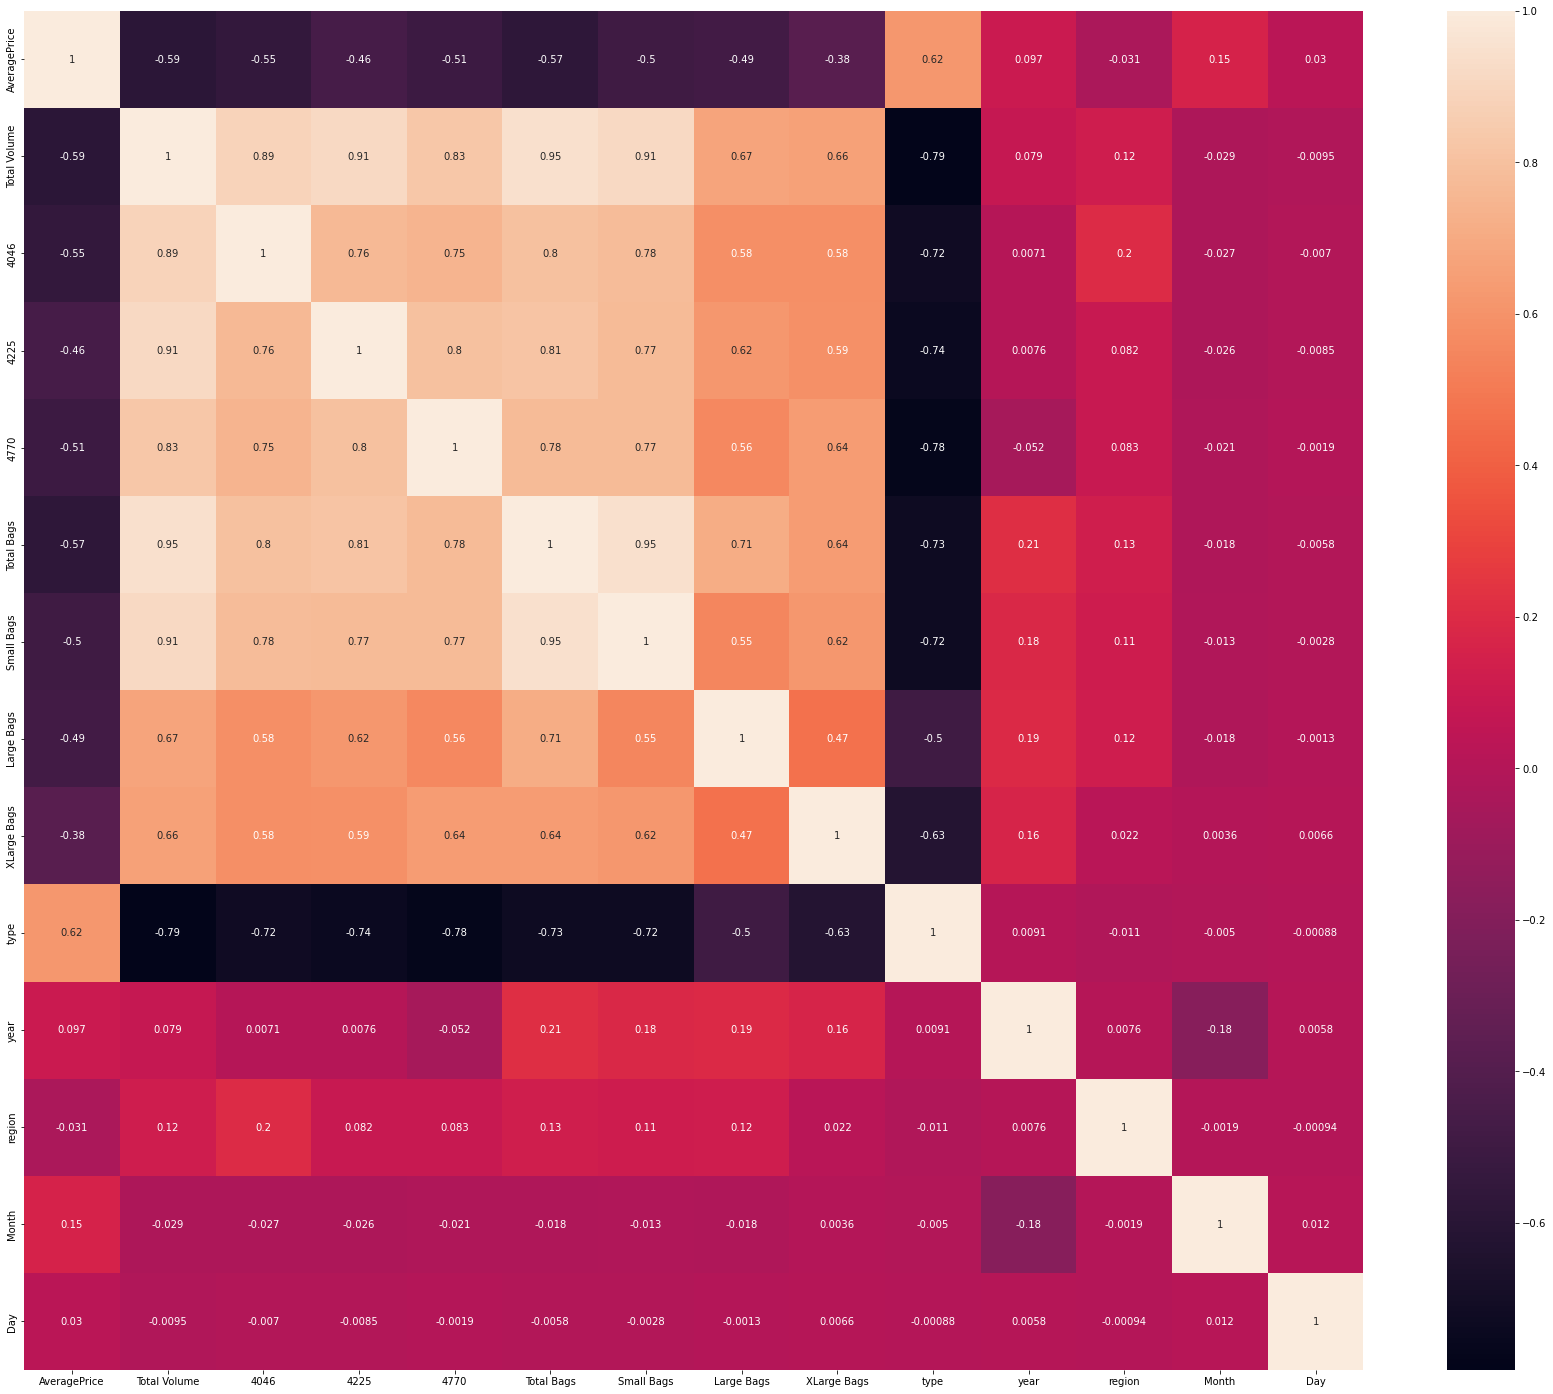

In [103]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [42]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [43]:
category = ['type','region']
lab = LabelEncoder()
for i in category:
    df[i] = lab.fit_transform(df[i].astype(str))

print(df.dtypes)

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
Day               int64
dtype: object


In [44]:
df.astype(float)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0,12.0,27.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0,12.0,20.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0,12.0,13.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0,12.0,6.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0,11.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018.0,53.0,2.0,4.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018.0,53.0,1.0,28.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018.0,53.0,1.0,21.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018.0,53.0,1.0,14.0


In [45]:
skew=('AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day')
for i in skew :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [46]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

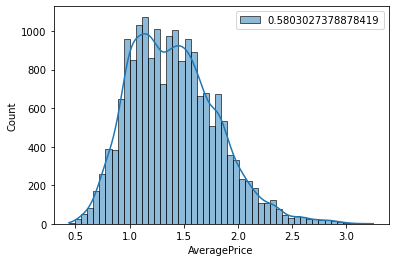

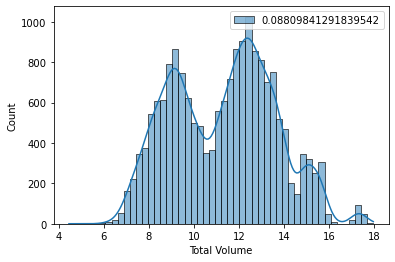

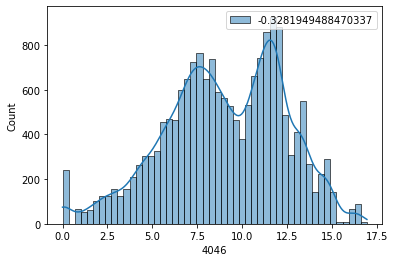

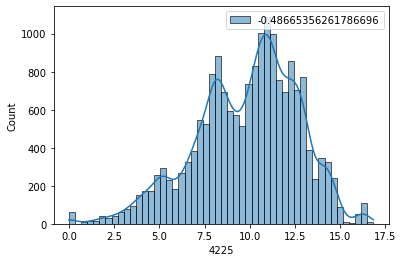

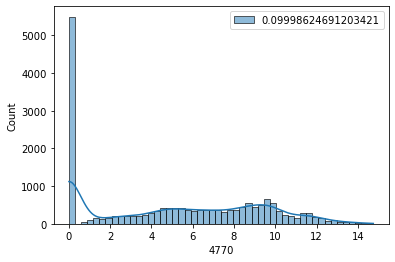

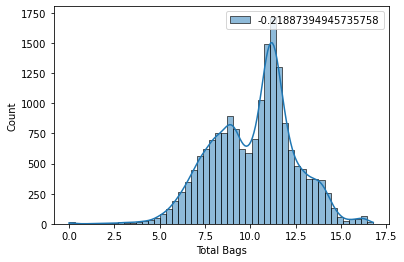

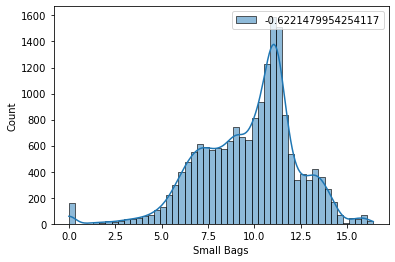

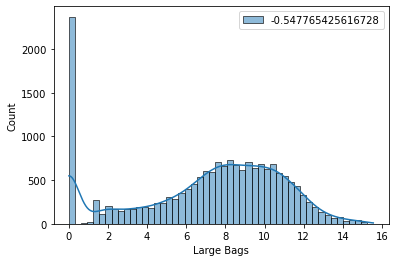

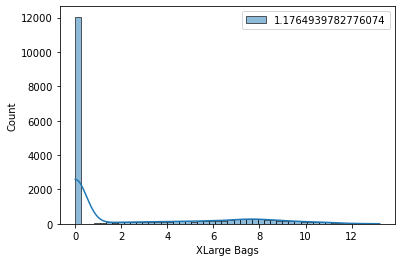

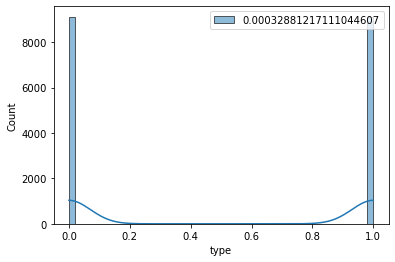

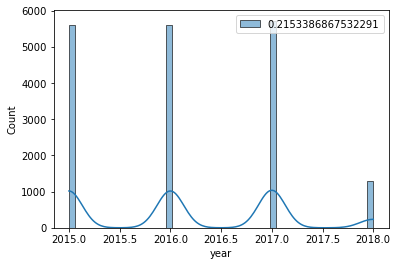

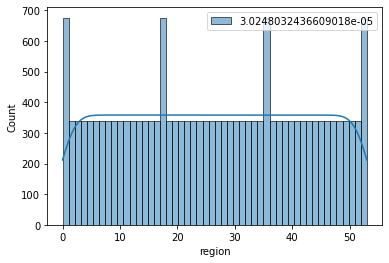

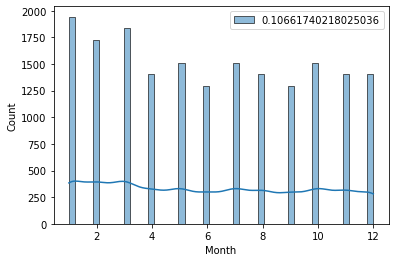

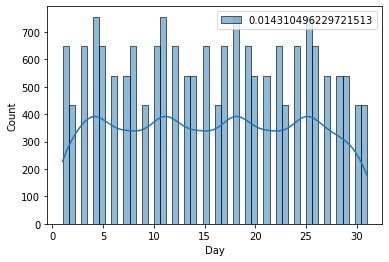

In [47]:
for i in skew:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

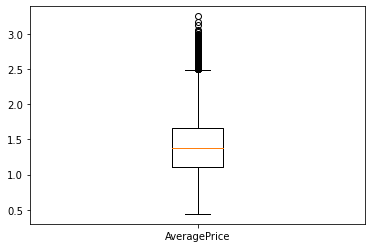

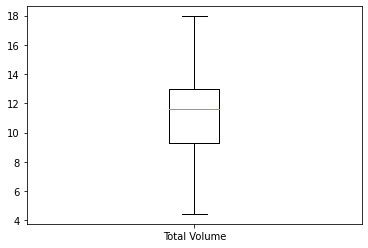

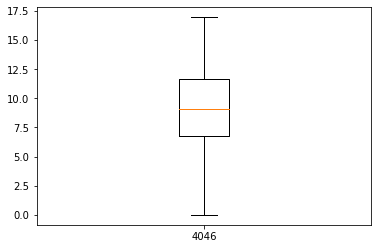

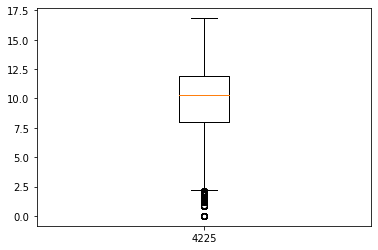

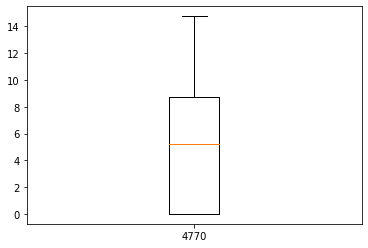

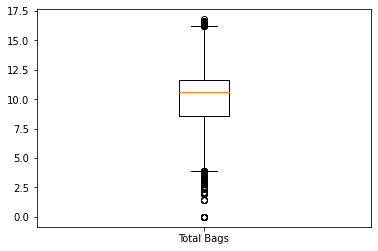

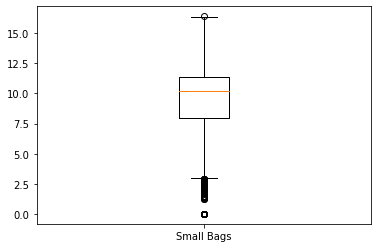

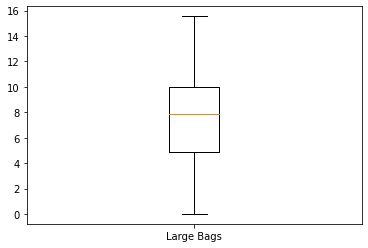

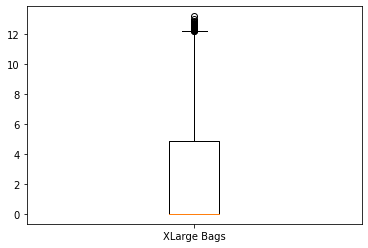

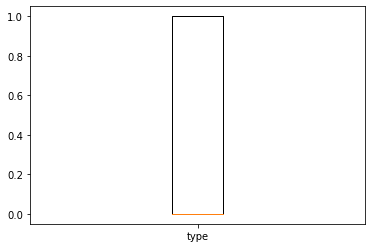

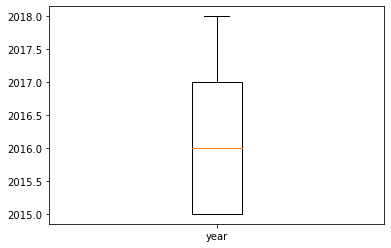

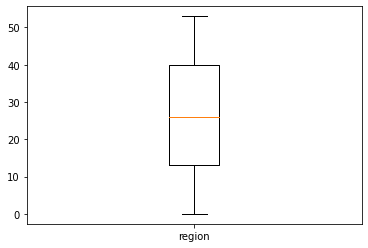

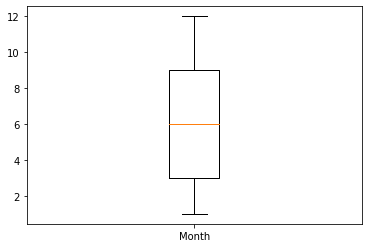

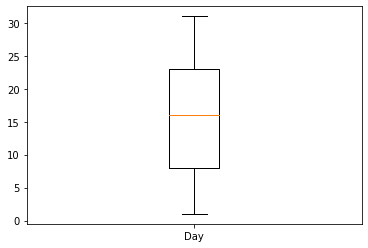

In [48]:
for i in skew:
    plt.boxplot(df[i], labels = [i])
    plt.show()

In [49]:
z = np.abs(zscore(df))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.107282  0.609752  0.374936  0.279143    0.494074   
1          0.139020      0.175949  0.737707  0.305200  0.233838    0.454761   
2          1.182069      0.158690  0.688840  0.618892  0.042078    0.523041   
3          0.809551      0.017121  0.583598  0.472808  0.181974    0.672335   
4          0.312861      0.207558  0.638425  0.298852  0.171717    0.644845   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.685006  0.407310  0.878279  1.217613    0.299689   
18245      0.755023      0.775077  0.568306  0.594835  1.217613    0.466102   
18246      1.152375      0.778901  0.568251  0.712597  0.370548    0.459975   
18247      1.301382      0.707798  0.494407  0.644192  0.370240    0.391424   
18248      0.531512      0.674542  0.304151  0.726698  0.087895    0.351204   

       Small Bags  Large Bags  XLarge Bags      typ

In [50]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [51]:
df_new = df[(z<3).all(axis = 1)]

In [52]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1,14


In [53]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outliers',df.shape)

(18249, 14)
(17834, 14)
Shape after removing outliers (17834, 14)


In [184]:
df.loc[df['4225']<3,'PLU_4225'] = np.mean(df['4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']<4,'Small Bags'] = np.mean(df['Small Bags'])

In [185]:
np.mean(df['4225'])

165600.94489433893

In [54]:
df.shape

(17834, 14)

In [55]:
df1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

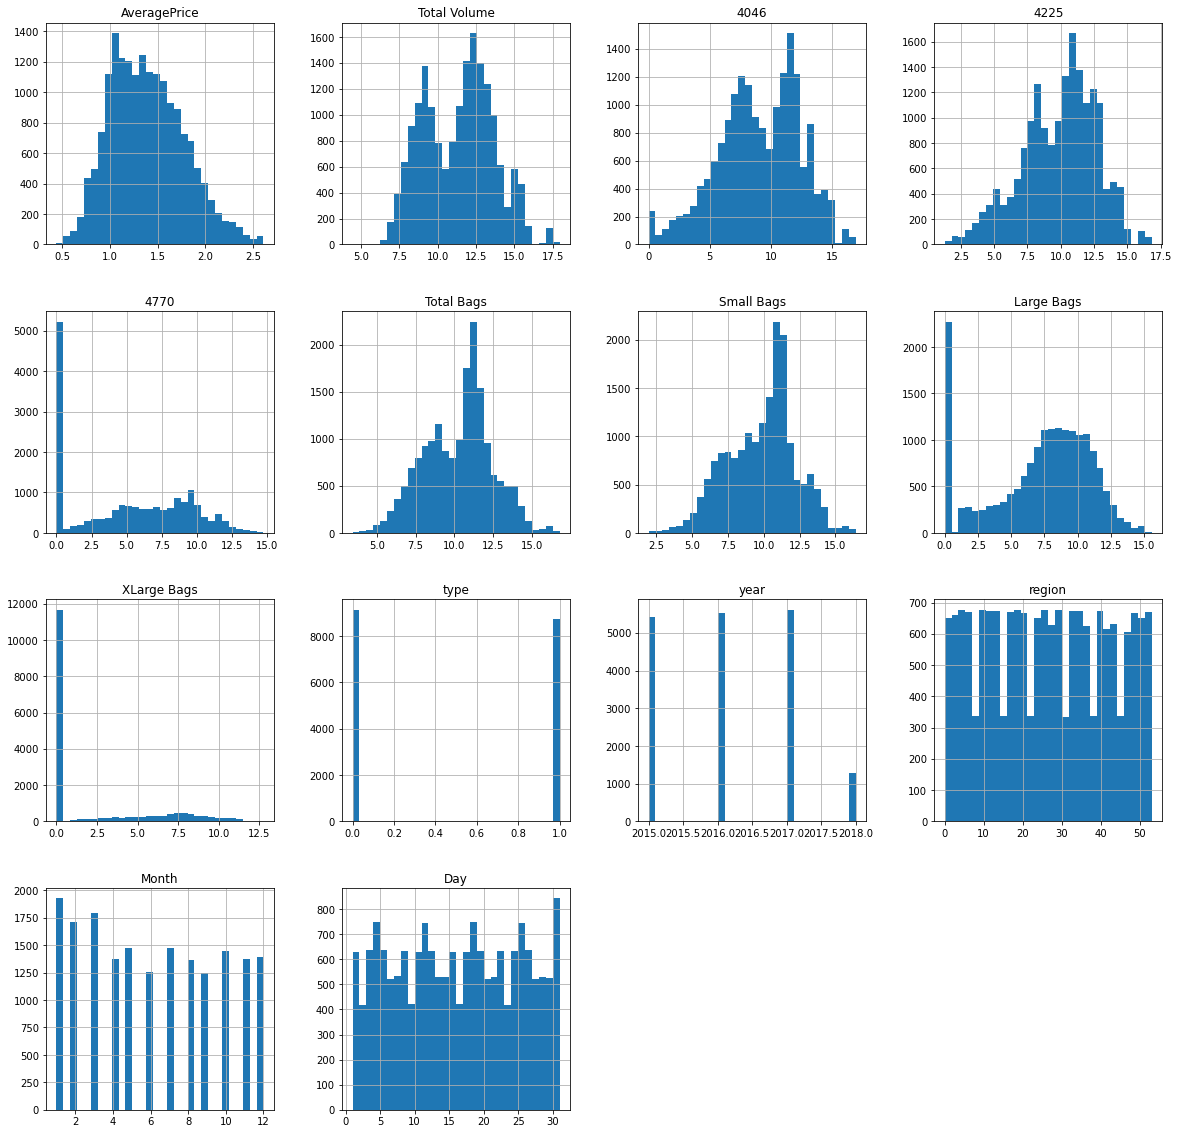

In [56]:
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [57]:
x_reg = df.drop(columns=['AveragePrice'])
y_reg = df[["AveragePrice"]]
print(x_reg.shape)
print(y_reg.shape)

(17834, 13)
(17834, 1)


In [58]:
sc = StandardScaler()
sc.fit_transform(x_reg)
x_reg = pd.DataFrame(x_reg,columns=x_reg.columns)

In [59]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(x_reg,y_reg,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score for the random state is 42 is 0.5752390581319049
R2 score for the random state is 42 is 0.753055115393152
R2 score for the random state is 42 is 0.5608299945046706
R2 score for the random state is 42 is 0.7420159480865187
R2 score for the random state is 42 is 0.6277112497922734
R2 score for the random state is 42 is 0.8999062518905543
R2 score for the random state is 42 is 0.8747638942632908
R2 score for the random state is 43 is 0.5626816666018744
R2 score for the random state is 43 is 0.748328200033598
R2 score for the random state is 43 is 0.5457995703115146
R2 score for the random state is 43 is 0.7399337106725736
R2 score for the random state is 43 is 0.6396460069401328
R2 score for the random state is 43 is 0.905502403047675
R2 score for the random state is 43 is 0.879732141693983
R2 score for the random state is 44 is 0.5797570012893072
R2 score for the random state is 44 is 0.753542305421851
R2 score for the random state is 44 is 0.5689252774095422
R2 score for the ra

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [66]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [67]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [68]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 340}

In [69]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=340, n_estimators=900)

In [71]:
ETR = ExtraTreesRegressor(n_estimators=900,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=340,random_state=74)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 90.7296206835108


In [72]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.08184630573488898
Mean squared Error:  0.01407825956108451
Root Mean Absolute Error:  0.2860879335709372


Text(0, 0.5, 'Predicted_Y')

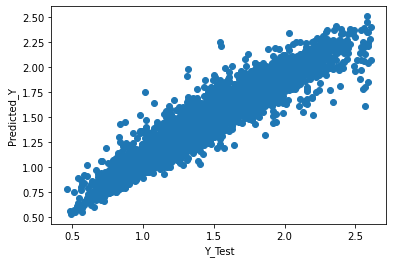

In [73]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [75]:
X_class = df.drop(columns=['region'])
y_class = df[["region"]]
print(X_class.shape)
print(y_class.shape)

(17834, 13)
(17834, 1)


In [76]:
sc = StandardScaler()
sc.fit_transform(X_class)
X_class = pd.DataFrame(X_class,columns=X_class.columns)

In [78]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_class,y_class,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.7833843017329256
accuracy score correspond to random state  40 is 0.36850152905198774
accuracy score correspond to random state  41 is 0.7840638803941556
accuracy score correspond to random state  41 is 0.3681617397213727
accuracy score correspond to random state  42 is 0.7903499830105335
accuracy score correspond to random state  42 is 0.37172952769283046
accuracy score correspond to random state  43 is 0.7903499830105335
accuracy score correspond to random state  43 is 0.36680258239891267
accuracy score correspond to random state  44 is 0.7852531430513082
accuracy score correspond to random state  44 is 0.36425416241930003
accuracy score correspond to random state  45 is 0.7874617737003058
accuracy score correspond to random state  45 is 0.3583078491335372
accuracy score correspond to random state  46 is 0.790519877675841
accuracy score correspond to random state  46 is 0.3577981651376147
accuracy score correspond to random state  47

In [79]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [84]:
dec = DecisionTreeClassifier(random_state=54)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [85]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=54), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [86]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=54)

In [87]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [88]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=54)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 77.26809378185526


In [89]:
score = cross_val_score(DTC,X_class,y_class,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  77.22136086874647
Mean Score      :  77.22136086874647
STD score       :  0.0


In [90]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [91]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

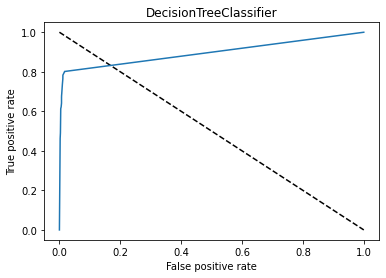

In [92]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [93]:
confusion_matrix(y_test, predc)

array([[101,   0,   0, ...,   0,   0,   0],
       [  0,  72,   0, ...,   0,   0,   0],
       [  0,   0,  90, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 105,   0,   0],
       [  0,   0,   0, ...,   1,  93,   0],
       [  0,   3,   3, ...,   0,   0,  65]], dtype=int64)

[Text(695.4491866340591, 1323.2368421052631, 'X[3] <= 12.124\nentropy = 5.752\nsamples = 11948\nvalue = [216, 208, 235, 207, 234, 235, 216, 224, 222, 235\n238, 224, 223, 235, 238, 237, 216, 244, 218, 229\n226, 221, 230, 218, 199, 229, 208, 188, 230, 236\n225, 205, 206, 225, 228, 226, 197, 220, 222, 220\n234, 213, 187, 191, 229, 231, 226, 183, 229, 232\n214, 226, 238, 222]'),
 Text(348.1457849611754, 1251.7105263157896, 'X[3] <= 7.034\nentropy = 5.662\nsamples = 9147\nvalue = [215, 206, 116, 207, 122, 235, 105, 224, 111, 235\n238, 121, 135, 232, 225, 116, 212, 159, 133, 229\n226, 220, 111, 218, 193, 110, 208, 188, 109, 113\n114, 205, 112, 133, 228, 111, 144, 220, 222, 220\n123, 185, 73, 140, 229, 112, 113, 183, 229, 232\n212, 0, 122, 213]'),
 Text(142.3159827953715, 1180.1842105263158, 'X[2] <= 7.17\nentropy = 4.42\nsamples = 1840\nvalue = [114, 2, 0, 76, 71, 122, 0, 4, 0, 0, 3, 100, 31\n0, 89, 0, 111, 0, 107, 33, 110, 4, 4, 47, 89\n0, 0, 79, 0, 0, 113, 88, 2, 17, 111, 0, 0, 0\n0, 0, 0,

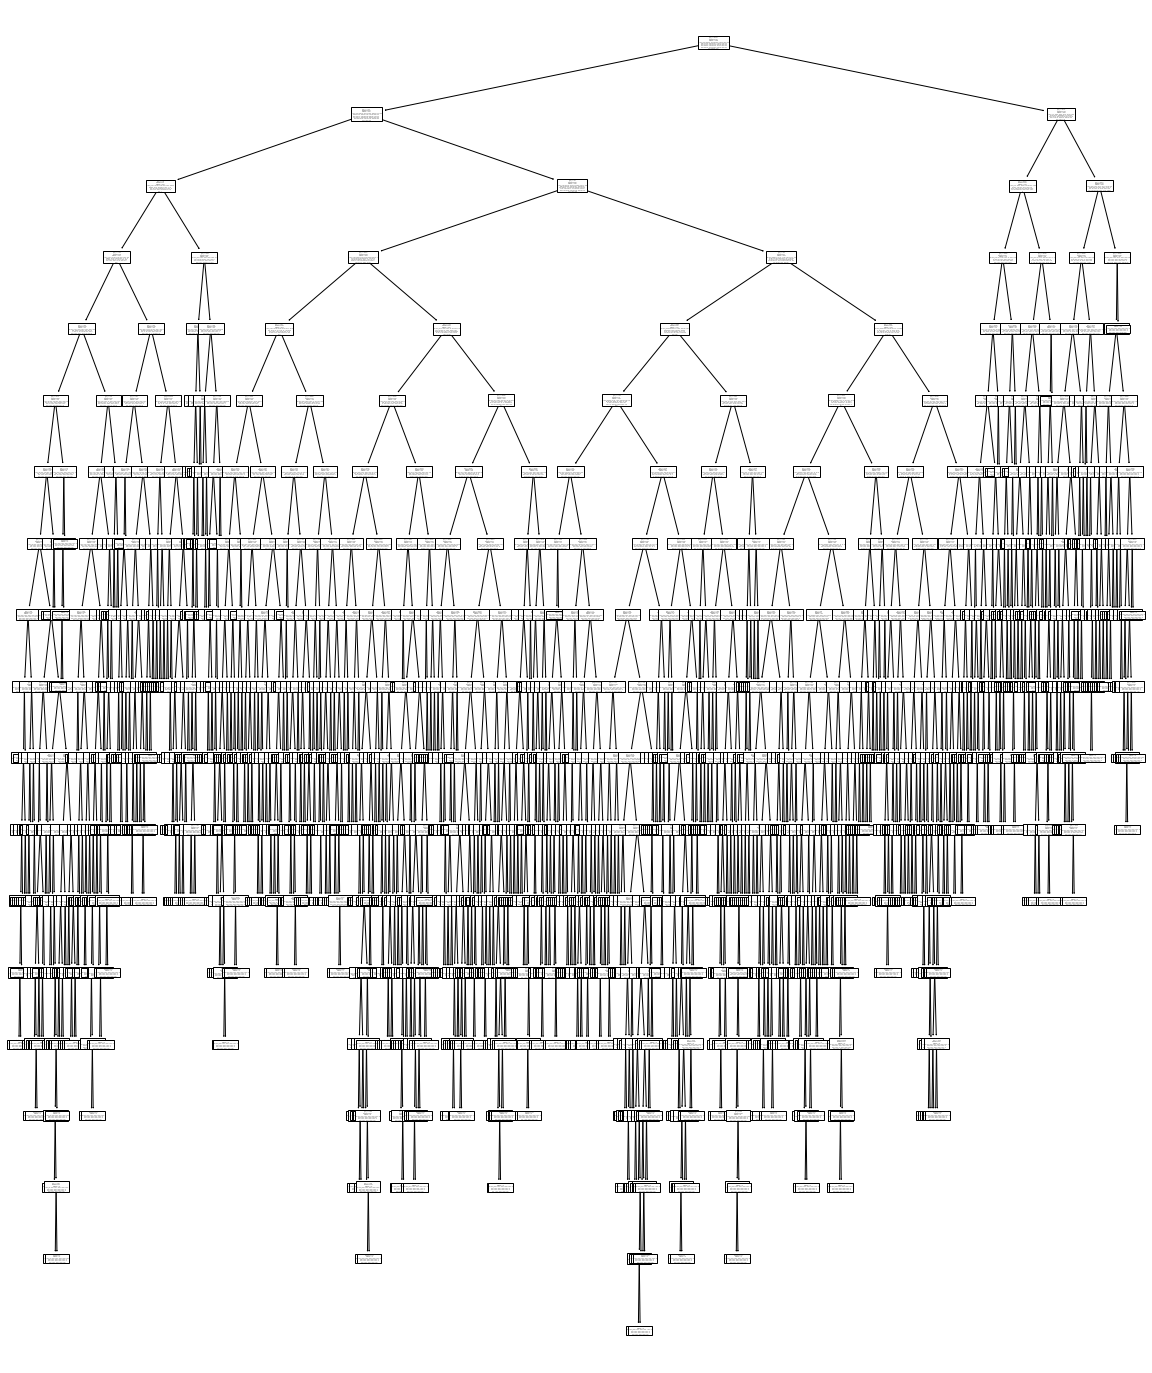

In [97]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

### Conclusion
This is about Avocado dataset
This dataset contains 18249 rows and 14 columns
Split the date into day, month and year

• It has 2 categorical features and 11 continuous features.

• No null value has been present in the dataset.

• From the line plots : We find that

Average price increase in the 30th day,10th month, year 2016

Organic average price is higher than conventional

San Francisco has highest price

• Most features do not have outliers


The model is evaluated by using regression and classification algorithms

•    Of the regression algorithms:

•    ExtraTreesRegressorof random state 81 give more accuracy

•    So cross validation is done using GridSearchCV

•    From this we get the best parameters, final R2 Score is 90.7296206835108.

1.	Mean Absolute Error:  0.08184630573488898
2.	Mean squared Error:  0.01407825956108451
3.	Root Mean Absolute Error:  0.2860879335709372

The classifier algorithm is evaluated using the similar procedure

        1.    DecisionTreeClassifier gives more accuracy and is cross validated.

1.	 Accuracy Score : 77.26809378185526 
2.	Cross_val_score :  77.22136086874647
3.	Mean Score         :  77.22136086874647
4.	STD score            :  0.0

Thus, we conclude that decision tree ExtraTreesRegressor algorithm gives the maximum accuracy of 90.7% and the attribution of the Avacado Average Price can be predicted by this algorithm
And decision tree classifier algorithm gives the maximum accuracy of 77% and the attribution of the Avacado region can be predicted by this algorithm
